In [1]:
%matplotlib inline
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
#essentially means to transfer the contents of the database into a different structure of data. 


Base = automap_base()

# reflect the tables......... COPY=REFLECT
#Remember when we talked about keeping our code decoupled? When we reflect tables, we create classes that help keep our code separate. 
#This ensures that our code is separated such that if other classes or systems want to interact with it, 
#they can interact with only specific subsets of data instead of the whole dataset.

Base.prepare(engine, reflect=True)



In [8]:
# We can view all of the classes that automap found.. NOW WE ARE VIEWING OUR DATA IN CLASSES; NOT TABLES
Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table Base.classes.<class name>
#Since it can be rather cumbersome to type Base.classes every time we want to reference the measurement or station classes, 
#we can give the classes new variable names. In this case, we will create new references for our Measurement class and Station class. 
#Add these new variables to your code:
Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
# Our session essentially allows us to query for data.

session = Session(engine)


# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

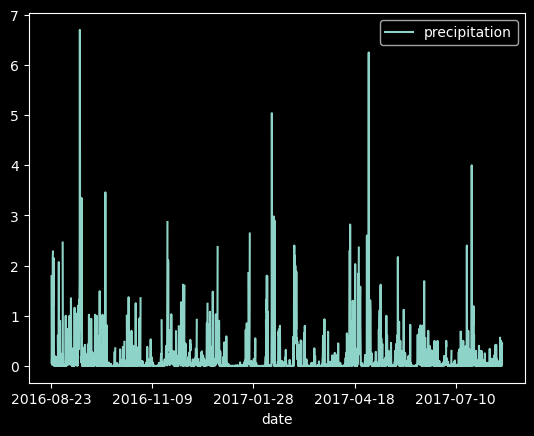

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Find the Date One Year Ago
#Add the most recent date, August 23, 2017, with the following code:
#Starting from the last data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
#We'll begin by creating a variable to store the results of the query we'll write. This variable will be called results:

results = []


#This code defines our new variable. Next, let's add our session that we created earlier so that we can query our database. 
#For this we'll use the session.query() function, which is how we'll begin all of our queries in SQLAlchemy. From a bird's-eye view, 
#this is how we query a SQLite database using Python.

#The session.query() function for this query will take two parameters. We will reference the Measurement table 
#using Measurement.date and Measurement.prcp. Add the following to your code:

#Since we only want to see the most recent data, we need to filter out all of the data that is older than a year from the last record date. 
#We'll use the filter() function to filter out the data we don't need. Add the filter() function to the existing query.


#One last thing: we'll add a function that extracts all of the results from our query and put them in a list. To do this,
#add .all() to the end of our existing query. All said and done, your query should look something like this:

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()



# Save the query results as a Pandas DataFrame and set the index to the date column
#In order to save our results as a DataFrame, we need to provide our results variable as one parameter and specify 
#the column names as our second parameter. To do this, we'll add the following line to our code:

df = pd.DataFrame(results, columns=['date','precipitation'])

#This saves our query results in two columns, date and precipitation. Now we can manipulate the results however we would like. 
#There are many functions you can use to manipulate how DataFrames look, but we'll start with using the set_index() function.
#or this project, we're going to experiment and write over our original DataFrame. By doing this, we can reduce the complexity of our code and use fewer variables.

#REWIND
#We can use the variable inplace to specify whether or not we want to create a new DataFrame.
#Let's go ahead and use the same DataFrame. By setting inplace=True, we're saying that we do not want to create a new DataFrame
#with the modified specifications. If we set it to "False," then we would create a new DataFrame. Add the following to your code:



# Sort the dataframe by date
df.set_index(df['date'], inplace=True) #THIS IS NOT SORTING THE DATA BY DATE.
#print(df)

#Great work! Our DataFrame looks good. However, because we are using the date as the index, the DataFrame has two date columns, 
#which is confusing. So we'll print the DataFrame without the index so we can see just the date and precipitation.

#For this task, we'll need to use a slightly different print statement. First we'll convert the DataFrame to strings, 
#and then we'll set our index to "False." This will allow us to print the DataFrame without the index. Add the following to your code:


#print(df.to_string(index=False))


#We're going to sort the values by date using the sort_index() function. Since we set our index to the date column previously, 
#we can use our new index to sort our results. Add the following line to your code:

df = df.sort_index()

#print(df.to_string(index=False))

df.plot()

# Use Pandas Plotting with Matplotlib to plot the data


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge